In [167]:
import random
import math
import numpy as np

In [168]:
size_sample=30
x = np.array([random.randint(0,size_sample*5) for i in range(size_sample)])
x

array([122,  76, 104, 109, 118, 136, 112,  40,  82,   2, 125, 146,  13,
        89, 147,  17, 108,  74,  32,  40, 143,  45,  44,  79, 125, 110,
       142,  94,  93,  27])

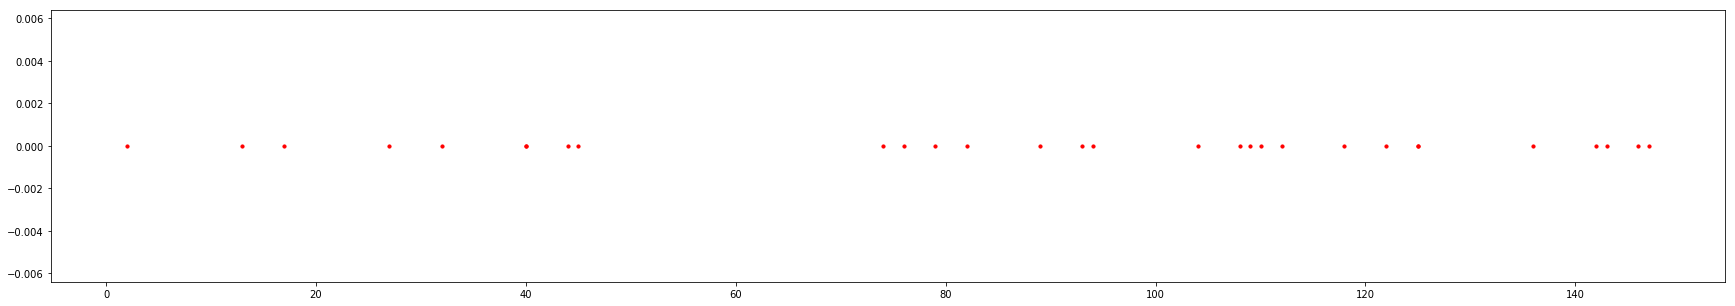

In [169]:
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(30,5))
plt.scatter(x=x,y=[0 for i in range(size_sample)],color='red',s=10)
plt.show()

In [170]:
clusters=[set([i]) for i in range(0,size_sample)]
len(clusters)

30

In [171]:
D = np.zeros((size_sample,size_sample))
for i in range(0,len(x)):
    for j in range(i+1,len(x)):
        D[j][i]=abs(x[i]-x[j])


In [172]:
def d_s(R_u_s,R_v_s):
    return float(0.5*(R_u_s+R_v_s+abs(R_u_s-R_v_s)))

In [173]:
while(len(clusters)!=1):
    v,u=0,1
    min_d=D[u][v]
    for i in range(0,len(D)):
        for j in range(i+1,len(D)):
            if(min_d>D[j][i]):
                min_d=D[j][i]
                v,u=j,i
    print(clusters[v],clusters[u],'d =',min_d)
    clusters[v]=clusters[v].union(clusters[u])
    for i in range(0,v):
        if(i!=v):
            D[v][i]=d_s(D[v][i],D[u][i])
    for i in range(v+1,len(D)):
        if(i!=v):
            D[i][v]=d_s(D[i][v],D[i][u])
    D = np.delete(D, (u), axis=0)
    D = np.delete(D, (u), axis=1)
    clusters.pop(u)

{19} {7} d = 0.0
{24} {10} d = 0.0
{16} {3} d = 1.0
{14} {11} d = 1.0
{26} {20} d = 1.0
{22} {21} d = 1.0
{28} {27} d = 1.0
{17} {1} d = 2.0
{25} {6} d = 2.0
{25, 6} {16, 3} d = 2.0
{24, 10} {0} d = 3.0
{23} {8} d = 3.0
{15} {12} d = 4.0
{27, 28} {13} d = 5.0
{26, 20} {11, 14} d = 5.0
{8, 23} {17, 1} d = 5.0
{29} {18} d = 5.0
{21, 22} {19, 7} d = 5.0
{24, 0, 10} {4} d = 7.0
{16, 25, 3, 6} {2} d = 8.0
{24, 0, 10, 4} {5} d = 11.0
{9} {12, 15} d = 15.0
{18, 29} {19, 21, 22, 7} d = 18.0
{27, 28, 13} {16, 2, 3, 6, 25} d = 19.0
{26, 11, 20, 14} {0, 4, 5, 24, 10} d = 29.0
{2, 3, 6, 13, 16, 25, 27, 28} {8, 17, 1, 23} d = 36.0
{18, 19, 21, 22, 7, 29} {9, 12, 15} d = 43.0
{0, 4, 5, 10, 11, 14, 20, 24, 26} {1, 2, 3, 6, 8, 13, 16, 17, 23, 25, 27, 28} d = 54.0
{0, 1, 2, 3, 4, 5, 6, 8, 10, 11, 13, 14, 16, 17, 20, 23, 24, 25, 26, 27, 28} {18, 19, 21, 22, 7, 9, 12, 29, 15} d = 120.0
